### Задача 1

Дана матрица объект-признак

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

и значения целевой переменной

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

    Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
    Является ли значимым получившееся уравнение регрессии?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
x0 = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [3]:
x1 = x0[:, 0]
x2 = x0[:, 1]
x3 = x0[:, 2]
x4 = x0[:, 3]

In [4]:
b1 = np.cov(x1, y, ddof = 1)[1,0]/np.var(x1, ddof = 1)
lr = y.mean() - b1*(x1.mean())
b1, lr

(0.7991693729496844, 8.655772591859533)

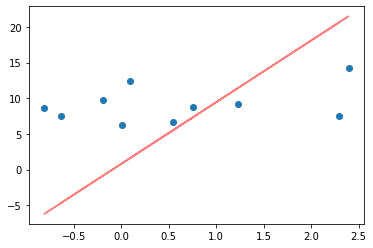

In [5]:
ox = x1
oy = b1 + lr*ox

plt.scatter(x1, y)
plt.plot(ox, oy, color='red', alpha=0.5)

In [6]:
b2 = np.cov(x2, y, ddof = 1)[1,0]/np.var(x2, ddof = 1)
lr2 = y.mean() - b2*(x2.mean())
b2, lr2

(1.4003156134853512, 6.169687722687238)

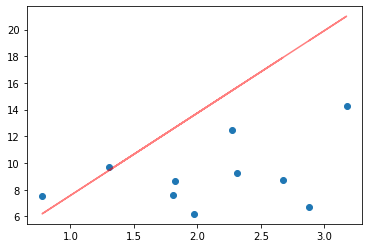

In [7]:
ox2 = x2
oy2 = b2 + lr2*ox2

plt.scatter(x2, y)
plt.plot(ox2, oy2, color='red', alpha=0.5)

In [8]:
b3 = np.cov(x3, y, ddof = 1)[1,0]/np.var(x3, ddof = 1)
lr3 = y.mean() - b3*(x3.mean())
b3, lr3

(0.803310579194931, 6.085300392407158)

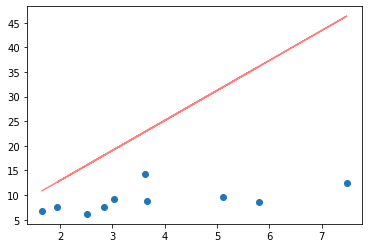

In [9]:
ox3 = x3
oy3 = b3 + lr3*ox3

plt.scatter(x3, y)
plt.plot(ox3, oy3, color='red', alpha=0.5)

In [10]:
b4 = np.cov(x4, y, ddof = 1)[1,0]/np.var(x4, ddof = 1)
lr4 = y.mean() - b4*(x4.mean())
b4, lr4

(1.1783848740628293, 5.956764181821933)

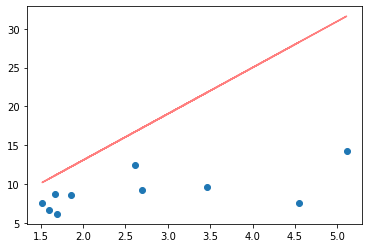

In [11]:
ox4 = x4
oy4 = b4 + lr4*ox4

plt.scatter(x4, y)
plt.plot(ox4, oy4, color='red', alpha=0.5)

## Сделал ДЗ как понял. Результаты первого столбца и второго столбца (признаки) дают лучше результат, чем другие два. 
Далее почитает значимость



In [12]:
ones = np.ones((x2.shape[0], 1))
x = np.hstack((ones, x0))
x

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [13]:
XTX = x.T.dot(x)

np.linalg.det(XTX)

113048.83568287804

In [14]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x.T).dot(y)


In [15]:
z2 = x.dot(b)
e2 = y - z2

e2

array([-2.19218244e-09,  1.12569811e-08, -2.99833580e-09,  1.17576970e-08,
       -7.04763714e-09, -2.13780282e-09, -1.58275082e-09, -5.99782624e-09,
       -1.61777614e-09,  5.59359670e-10])

In [16]:
e2.mean()

-2.7355895326763858e-14

In [17]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [18]:
R2 = 1 - sum_of_squares(e2) / sum_of_squares(y)
R2

1.0

In [19]:
n = x1.shape[0] 
m = 1
k1 = m 
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
F = (R2 / k1) / ((1 - R2) / k2)
t, F

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


(5.317655071578714, inf)

Данные не значимы, т.к. F больше t (попала в критическую область)

Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [20]:
n1 = 2509
y1 = 77
n2 = 1465
y2 = 60

In [21]:
y1_mean  = y1/n1
y1_mean

0.03068951773614986

In [22]:
y2_mean = y2/n2
y2_mean

0.040955631399317405

In [23]:
y1_y2_mean = (y1+y2)/(n1+n2)
y1_y2_mean

0.03447408152994464

In [24]:
F = y1_y2_mean/y1_mean
F

1.1233177994627417

In [27]:
alpha = 0.05
t1 = stats.norm.ppf(1 - alpha)
t2 = stats.norm.ppf(alpha)
t1, t2

(1.6448536269514722, -1.6448536269514729)

Значение не попало в критическую область, поэтому нулевая гипотеза принимается. Разница конверсиии не значима.

### Задача 3
Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{ "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89] }

По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.


In [29]:
data = {"x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74], "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73], "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}


In [30]:
np.mean(data['x1']), np.mean(data['x2']), np.mean(data['x3']), np.mean(data['x4'])

(9.0, 9.0, 9.0, 9.0)

In [31]:
np.mean(data['y1']), np.mean(data['y2']), np.mean(data['y3']), np.mean(data['y4'])

(7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091)

In [32]:
np.var(data['x1'], ddof = 1), np.var(data['x2'], ddof = 1), np.var(data['x3'], ddof = 1), np.var(data['x4'], ddof = 1)


(11.0, 11.0, 11.0, 11.0)

In [33]:
np.var(data['y1'], ddof = 1), np.var(data['y2'], ddof = 1), np.var(data['y3'], ddof = 1), np.var(data['y4'], ddof = 1)

(4.127269090909091, 4.127629090909091, 4.12262, 4.123249090909091)

In [34]:
np.corrcoef(data['x1'], data['y1'])[0,1]

0.81642051634484

In [35]:
np.corrcoef(data['x2'], data['y2'])[0,1]

0.8162365060002428

In [36]:
np.corrcoef(data['x3'], data['y3'])[0,1]

0.8162867394895984

In [37]:
np.corrcoef(data['x4'], data['y4'])[0,1]

0.8165214368885028

In [38]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - np.mean(samples)) ** 2).sum()

In [41]:
cov1 = np.cov(data['x1'], data['y1'], ddof = 1)[1,0]/np.var(data['x1'], ddof = 1)
lr1 = np.mean(data['y1']) - cov1*(np.mean(data['x1']))
cov1, lr1
cov2 = np.cov(data['x2'], data['y2'], ddof = 1)[1,0]/np.var(data['x2'], ddof = 1)
lr2 = np.mean(data['y2']) - cov2*(np.mean(data['x2']))
cov2, lr2
cov3 = np.cov(data['x3'], data['y3'], ddof = 1)[1,0]/np.var(data['x3'], ddof = 1)
lr3 = np.mean(data['y3']) - cov3*(np.mean(data['x3']))
cov3, lr3
cov4 = np.cov(data['x4'], data['y4'], ddof = 1)[1,0]/np.var(data['x4'], ddof = 1)
lr4 = np.mean(data['y4']) - cov4*(np.mean(data['x4']))
print(cov1, lr1, '\n' , cov2, lr2, '\n' ,cov3, lr3, '\n' ,cov4, lr4)

0.5000909090909093 3.0000909090909094 
 0.5000000000000001 3.000909090909089 
 0.49972727272727285 3.002454545454544 
 0.49990909090909086 3.0017272727272735


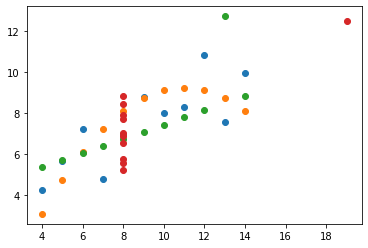

In [42]:
plt.scatter(data['x1'],data['y1'])
plt.scatter(data['x2'],data['y2'])
plt.scatter(data['x3'],data['y3'])
plt.scatter(data['x4'],data['y4'])


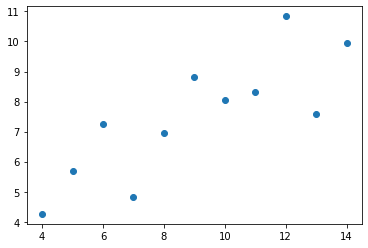

In [43]:
plt.scatter(data['x1'],data['y1'])


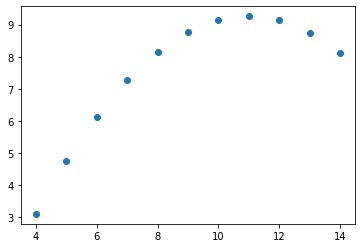

In [44]:
plt.scatter(data['x2'],data['y2'])


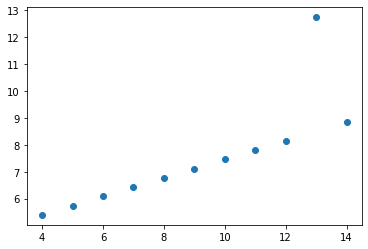

In [45]:
plt.scatter(data['x3'],data['y3'])


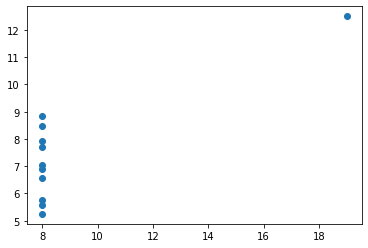

In [46]:
plt.scatter(data['x4'],data['y4'])
